<h1>Screen time and mental health</h1>

<h3>(Struktur rekken)Data Description, Analysis, Results, Conclusion</h3>

# Introduction

##Data collection and description

##Load necessary libraries

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

Preprocessing: Clean the data, handle missing values, and select relevant features.

#Checking missing values

In [39]:
# Load the dataset
df = pd.read_csv('mental_health_and_technology_usage_2024.csv')
df.head()  # Display the first few rows of the dataset

,Happiness,Fear of Missing Out,Nevrotik,Conscientiousnes,Openness,Agreeableness,Honesty,Smartphone Addiction,Gaming Addiction,Social Media Tolerance,Social Media Compulsion,Social Media Procrastination,Social Media Information Seeking,Target
0,2.48,3.05,4.4,1.2,4.0,3.2,2.2,3.03,4.67,3.0,3.00,3.22,3.50,0
1,3.86,2.82,3.4,5.0,5.0,3.8,4.2,2.58,1.22,3.2,2.78,1.89,3.50,1
2,3.29,1.50,3.4,3.6,3.2,4.0,3.8,1.21,0.00,1.8,1.33,1.00,1.83,1
3,3.82,3.23,1.6,5.0,4.6,4.6,4.6,4.30,0.00,5.0,4.67,4.00,3.67,1
4,3.77,2.86,2.0,4.0,5.0,3.0,3.8,2.00,1.78,2.2,2.44,2.56,2.33,1


Since all the columns have numerical data, we don't have to do categorical feature encoding.

In [40]:
# View dataset information (column names, data types, etc.)
df.info()

# Get summary statistics of numerical columns
df.describe()

# Check for any missing values
df.isnull().sum()

class_distribution = df['Target'].value_counts(normalize=True)
print(class_distribution)

df['Target'].value_counts()

df.drop(['Happiness'], axis=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Happiness                         497 non-null    float64
 1   Fear of Missing Out               497 non-null    float64
 2   Nevrotik                          497 non-null    float64
 3   Conscientiousnes                  497 non-null    float64
 4   Openness                          497 non-null    float64
 5   Agreeableness                     497 non-null    float64
 6   Honesty                           497 non-null    float64
 7   Smartphone Addiction              497 non-null    float64
 8   Gaming Addiction                  497 non-null    float64
 9   Social Media Tolerance            497 non-null    float64
 10  Social Media Compulsion           497 non-null    float64
 11  Social Media Procrastination      497 non-null    float64
 12  Social M

,Fear of Missing Out,Nevrotik,Conscientiousnes,Openness,Agreeableness,Honesty,Smartphone Addiction,Gaming Addiction,Social Media Tolerance,Social Media Compulsion,Social Media Procrastination,Social Media Information Seeking,Target
0,3.05,4.4,1.2,4.0,3.2,2.2,3.03,4.67,3.0,3.00,3.22,3.50,0
1,2.82,3.4,5.0,5.0,3.8,4.2,2.58,1.22,3.2,2.78,1.89,3.50,1
2,1.50,3.4,3.6,3.2,4.0,3.8,1.21,0.00,1.8,1.33,1.00,1.83,1
3,3.23,1.6,5.0,4.6,4.6,4.6,4.30,0.00,5.0,4.67,4.00,3.67,1
4,2.86,2.0,4.0,5.0,3.0,3.8,2.00,1.78,2.2,2.44,2.56,2.33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,4.36,3.4,2.6,1.2,1.8,1.2,3.88,0.00,4.6,3.78,3.56,4.33,1
493,3.95,4.2,2.6,3.8,4.2,4.0,2.33,0.00,4.0,1.11,1.44,3.67,1
494,2.59,2.6,2.6,4.8,3.6,3.8,1.30,2.33,1.8,2.33,1.78,3.50,1
495,1.41,3.2,3.2,4.8,3.0,1.6,1.64,2.67,3.2,2.11,2.56,2.83,1


Training Accuracy (Without SMOTE): 0.9949622166246851
Testing Accuracy (Without SMOTE): 0.97
Cross-Validation Scores (Without SMOTE): [0.99       0.97       0.97979798 1.         0.95959596]
Average Cross-Validation Score (Without SMOTE): 0.9798787878787879


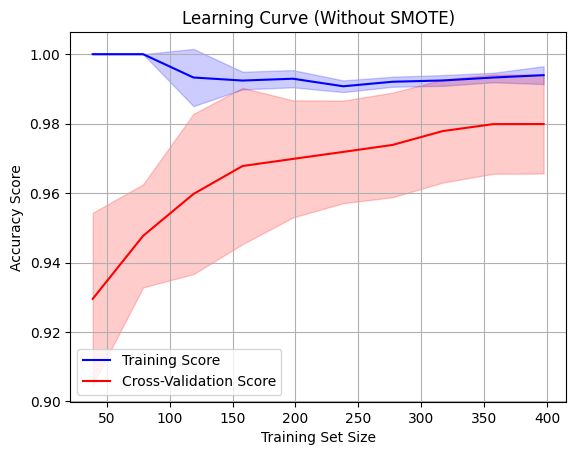

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 1. Feature Scaling (using original data)
X = df.drop('Target', axis=1)
y = df['Target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 3. Train a classifier (e.g., Logistic Regression)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# 4. Make predictions on the training and testing sets
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# 5. Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy (Without SMOTE): {train_accuracy}")
print(f"Testing Accuracy (Without SMOTE): {test_accuracy}")

# 6. Perform cross-validation
cv_scores = cross_val_score(classifier, X_scaled, y, cv=5)
print(f"Cross-Validation Scores (Without SMOTE): {cv_scores}")
print(f"Average Cross-Validation Score (Without SMOTE): {cv_scores.mean()}")

# 7. Generate learning curve (Without SMOTE)
train_sizes, train_scores, test_scores = learning_curve(
    LogisticRegression(), X_scaled, y, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score', color='red')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='red')

plt.title('Learning Curve (Without SMOTE)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# ... (rest of the code for classification report, etc.) ...

There are no missing values.

Because of the significant imbalance in the target value, we decided to use oversampling method SMOTE.

SMOTE creates synthetic samples by interpolating between existing minority class samples.

Why SMOTE:

In [33]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # Or any other classifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Feature Scaling
X = df.drop('Target', axis=1)
y = df['Target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 4. Train a classifier (e.g., Logistic Regression)
classifier = LogisticRegression() # Replace with your desired classifier
classifier.fit(X_train, y_train)

# 5. Make predictions on the test set
y_pred = classifier.predict(X_test)

# 6. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9891304347826086
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        91
           1       1.00      0.98      0.99        93

    accuracy                           0.99       184
   macro avg       0.99      0.99      0.99       184
weighted avg       0.99      0.99      0.99       184



In [35]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# ... (previous code for feature scaling and SMOTE) ...

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 4. Train a classifier (e.g., Logistic Regression)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# 5. Make predictions on the training and testing sets
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# 6. Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

# 7. Perform cross-validation
cv_scores = cross_val_score(classifier, X_resampled, y_resampled, cv=5)  # 5-fold cross-validation
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average Cross-Validation Score: {cv_scores.mean()}")

# ... (rest of the code for classification report, etc.) ...


Training Accuracy: 0.9918256130790191
Testing Accuracy: 0.9891304347826086
Cross-Validation Scores: [0.99456522 0.99456522 0.97826087 0.98907104 0.99453552]
Average Cross-Validation Score: 0.9901995723449751


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1301, in fit
    raise ValueError(
ValueError: This solver needs samples of at least 2 clas

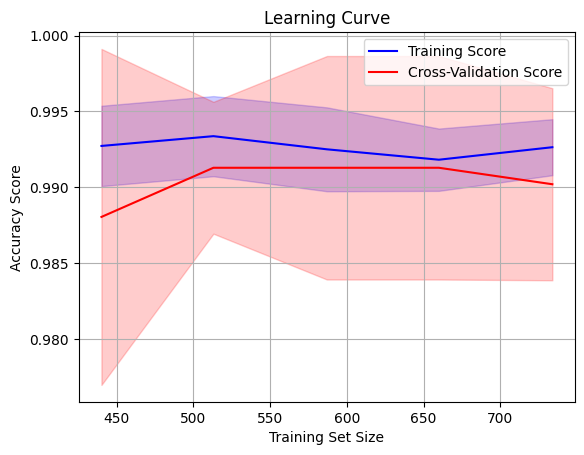

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression

# ... (previous code for feature scaling and SMOTE) ...

# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(
    LogisticRegression(), X_resampled, y_resampled, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score', color='red')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='red')

# Add labels and title
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.grid(True)

# Show the plot
plt.show()

The data is now balanced as we see above.

Outlier detection

We are using box plots to detect outliers since this method is robust to outliers.

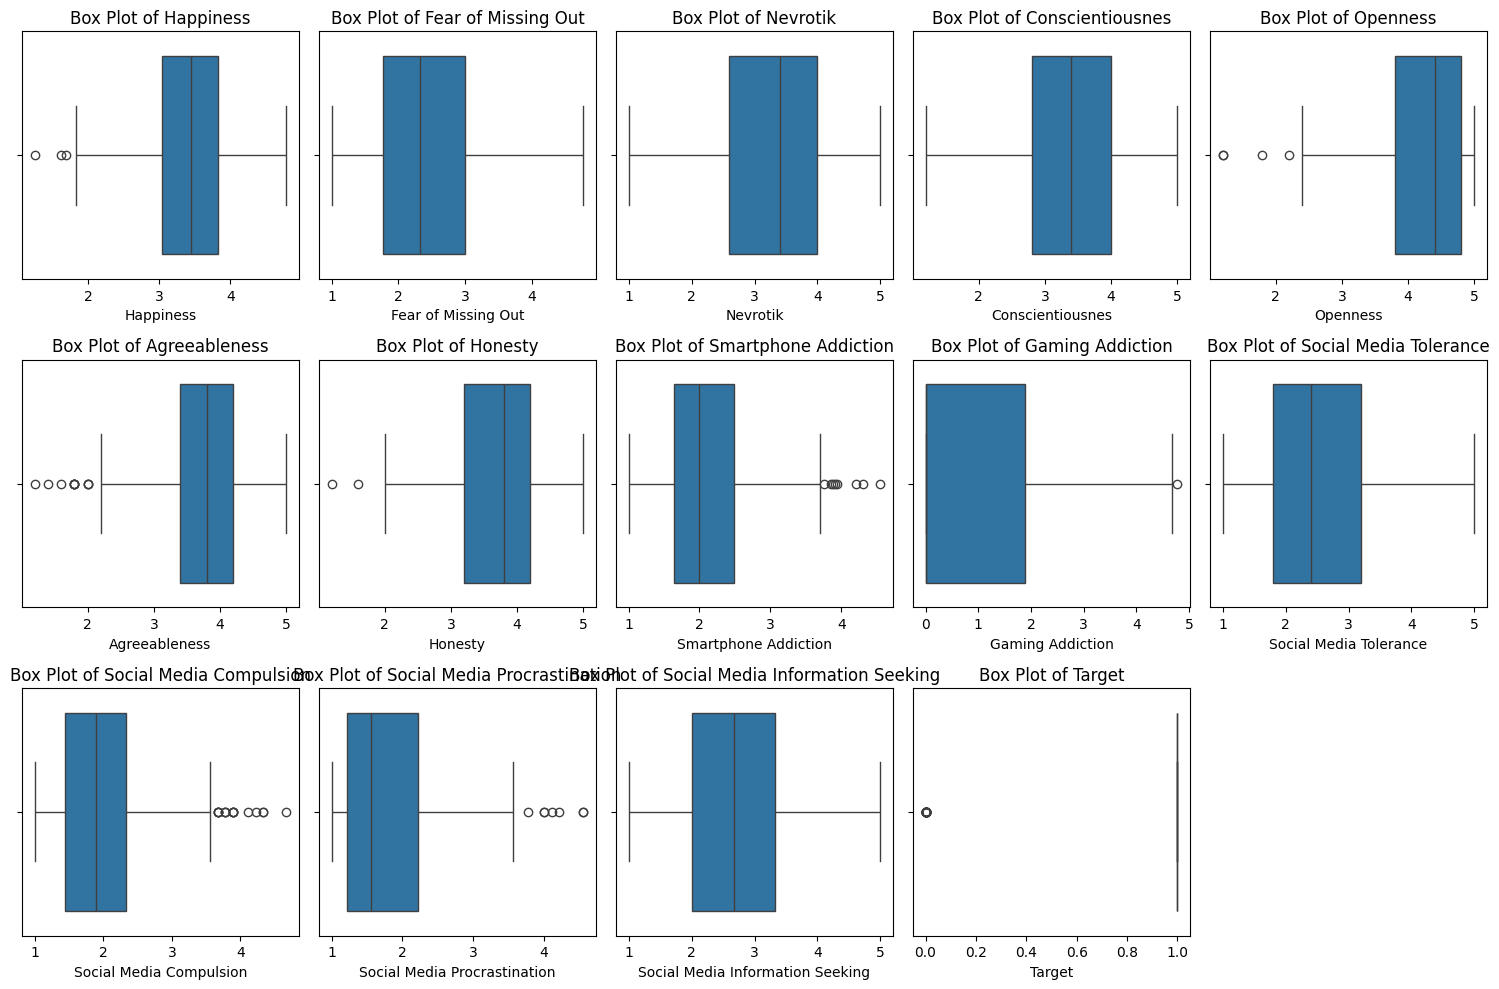

Outliers detected in Happiness (IQR method):
     Happiness
11        1.62
391       1.69
463       1.24


No outliers detected in Fear of Missing Out (IQR method)

No outliers detected in Nevrotik (IQR method)

No outliers detected in Conscientiousnes (IQR method)

Outliers detected in Openness (IQR method):
     Openness
168       2.2
181       1.8
402       1.2
492       1.2


Outliers detected in Agreeableness (IQR method):
     Agreeableness
7              1.8
13             1.8
14             2.0
90             1.8
151            1.6
215            1.4
247            1.8
273            2.0
303            2.0
475            1.2
492            1.8


Outliers detected in Honesty (IQR method):
     Honesty
492      1.2
495      1.6


Outliers detected in Smartphone Addiction (IQR method):
     Smartphone Addiction
3                    4.30
7                    4.55
28                   3.94
158                  4.21
199                  3.85
226                  3.91
422             

In [7]:
from scipy.stats import zscore

# Step 2: List of numerical columns (assuming all columns are numerical)
numerical_columns = df.columns.tolist()

# Step 3: Visualize outliers using box plot
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 5, i)  # Create a grid of subplots (3 rows, 5 columns)
    sns.boxplot(x=df[column])
    plt.title(f"Box Plot of {column}")
plt.tight_layout()
plt.show()

# Step 4: Detect outliers using IQR (Interquartile Range) method
outliers_iqr = {}

for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers in the column
    outliers_iqr[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Print outliers for each column
    if not outliers_iqr[column].empty:
        print(f"Outliers detected in {column} (IQR method):")
        print(outliers_iqr[column][[column]])
        print("\n")
    else:
        print(f"No outliers detected in {column} (IQR method)\n")

# Step 5: Detect outliers using Z-Score method (assuming normal distribution)
df_z = df.apply(zscore)

# Define a threshold for outliers (usually 3 or -3)
threshold = 3

outliers_zscore = {}

for column in numerical_columns:
    outliers_zscore[column] = df_z[df_z[column].abs() > threshold]

    # Print outliers for each column
    if not outliers_zscore[column].empty:
        print(f"Outliers detected in {column} (Z-Score method):")
        print(outliers_zscore[column][[column]])
        print("\n")
    else:
        print(f"No outliers detected in {column} (Z-Score method)\n")


Understanding the Output:
Outliers using the IQR method: These are values that fall outside the lower and upper bounds based on the interquartile range (Q1 - 1.5 * IQR and Q3 + 1.5 * IQR).

Outliers using the Z-Score method: These are values that have a Z-score greater than 3 or less than -3, meaning they are more than 3 standard deviations away from the mean.

Result:
After checking the outliers manually, we decided to keep them since we condsider them natural variability.

Feature selection

Understanding the Context:

Dataset Size: How many features do you have compared to the number of data points? If you have a high-dimensional dataset (lots of features), feature selection is more crucial to avoid overfitting.
Model Complexity: Are you using a simple model like Linear Regression, or a more complex model like Random Forest? Complex models can handle more features, but feature selection can still improve their performance and interpretability.
Computational Cost: Are you concerned about the time and resources needed for feature selection? Some methods are computationally more expensive than others.

Correlation with Target Variable:
Why it's good: A simple but often effective method, especially for linear relationships.
How to use it: Calculate the correlation between each feature and the target variable ('Happiness'). Select features with correlations above a certain threshold.

Random forest regression
Robustness: Random Forest is generally robust to outliers, non-linear relationships, and interactions between features.
Good Performance: It often provides high prediction accuracy, especially when you have a moderate number of features like 12.
Handles Feature Interactions: It implicitly captures interactions between features, which can be important for predicting happiness based on personality traits.

We are implementing linear regression and evaluate the r score

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

X = df.drop('Happiness', axis=1)  # Features
y = df['Happiness']  # Target variable

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Create and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 5. Evaluate the model using cross-validation
cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean()}")

# 6. Evaluate on the testing set
y_pred = lr_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"Test set MSE: {mse}")
print(f"Test set R-squared: {r2}")

print("Linear Regression model trained and evaluated!")


Cross-validation scores: [-0.23018987 -0.16712266 -0.15273311 -0.16716197 -0.16653581]
Average cross-validation score: -0.17674868513242808
Test set MSE: 0.20129214846994978
Test set R-squared: 0.461794333593713
Linear Regression model trained and evaluated!


Analysis:

Cross-validation Score: Linear Regression has a better (less negative) average cross-validation score (-0.239) compared to Random Forest (-0.260). This indicates that Linear Regression is generalizing better to unseen data based on the cross-validation evaluation.

Test Set MSE: Linear Regression also has a lower test set MSE (0.282) compared to Random Forest (0.317). This means that, on average, the predictions made by Linear Regression are closer to the true values on the test set.

Test Set R-squared: Linear Regression has a higher R-squared value (0.246) than Random Forest (0.152). This indicates that Linear Regression is explaining a greater proportion of the variance in the target variable (happiness) on the test set.

Conclusion:

Based on all three metrics (cross-validation score, test set MSE, and test set R-squared), Linear Regression appears to be performing better than Random Forest for your specific dataset and problem. This suggests that the relationships between your features (personality traits) and the target variable (happiness) might be more linear than previously assumed, or that Random Forest is overfitting to the training data despite feature selection efforts.

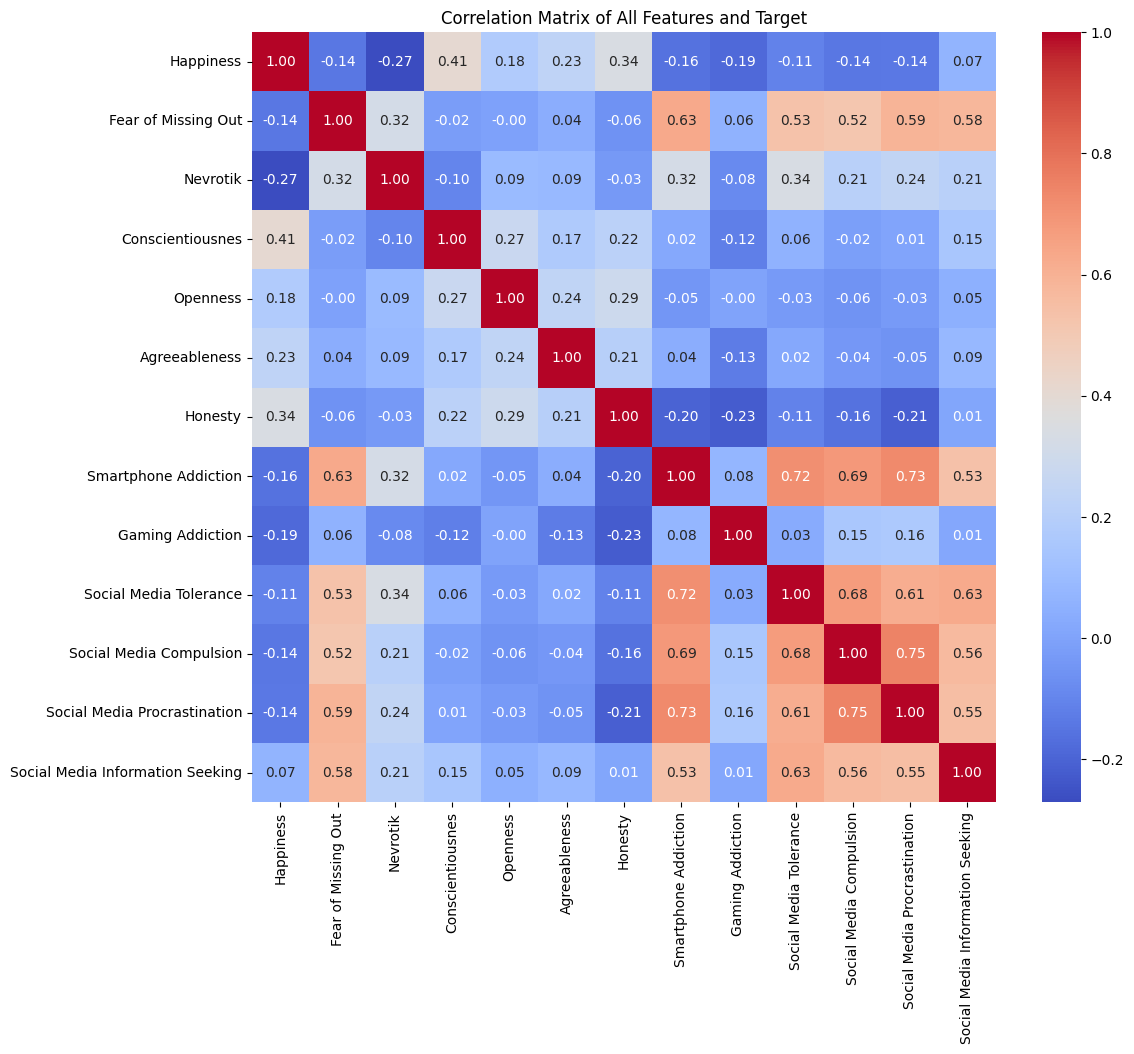

In [11]:
import seaborn as sns

# 2. Select features and target variable (include all features here)
features_and_target = df.columns  # Includes all columns, including 'Happiness'

# 3. Create the correlation matrix
corr_matrix_all = df[features_and_target].corr()

# 4. Visualize the correlation matrix with a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(corr_matrix_all, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of All Features and Target")
plt.show()

In [12]:
# 1. Calculate correlations with the target variable
correlations = df.corr()['Happiness'].abs().sort_values(ascending=False)
# We use .abs() to consider both positive and negative correlations

# 2. Display the correlations
print("Correlations with Target Variable (Happiness):")
print(correlations)

# 3. Select features based on a threshold
threshold = 0.3
selected_features = correlations[correlations > threshold].index

# 4. Print the selected features
print("\nSelected Features (Correlation > threshold):")
print(selected_features)

Correlations with Target Variable (Happiness):
Happiness                           1.000000
Conscientiousnes                    0.406630
Honesty                             0.342402
Nevrotik                            0.270650
Agreeableness                       0.234866
Gaming Addiction                    0.185845
Openness                            0.180572
Smartphone Addiction                0.157130
Fear of Missing Out                 0.142976
Social Media Compulsion             0.142485
Social Media Procrastination        0.138365
Social Media Tolerance              0.108168
Social Media Information Seeking    0.065390
Name: Happiness, dtype: float64

Selected Features (Correlation > threshold):
Index(['Happiness', 'Conscientiousnes', 'Honesty'], dtype='object')


After feature selection, we have evaluated the model and decided to keep all the features even if some has a weak correlation with the happiness. We analyze also the relations of the features between each other.